# Using Machine Learning Tools: Workshop 1

**Chapter 1 – The Machine Learning landscape**

This is a cut down version of the code accompanying Chapter 1 of 
_Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow, 2e_ by Aurelien Geron

All code for the book is available at https://github.com/ageron/handson-ml2

--------------------------------------------------------------------

First check we have the required Python libraries.

Although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
# Code example
import numpy as np
import pandas as pd
import sklearn.linear_model

(29, 1)
(29, 1)


<AxesSubplot:xlabel='GDP per capita', ylabel='Life satisfaction'>

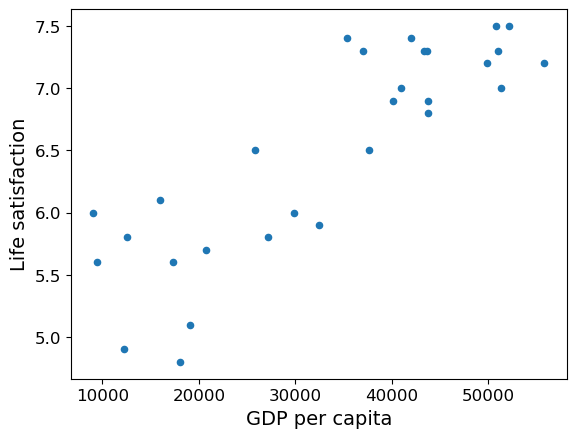

In [5]:
# Load the data using a pandas function
country_stats = pd.read_csv("lifesat.csv")

# Note that np.c_ is used in order to make vectors the right *shape* - that is: (N,1) and not (N,) 
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]
print(X.shape)
print(y.shape)

# Plot the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

In [6]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

In [7]:
# Train the model
model.fit(X, y)

LinearRegression()

In [18]:
# Visualise the model as a red line
#  - pull out the intercept and slope (only works for linear regressions)
t0, t1 = model.intercept_[0], model.coef_[0][0] 
modelX = np.linspace(10000, 55000, 1000)
plt.scatter(X, y)
plt.xlabel('GDP per capita')
plt.ylabel('Life satisfaction')
plt.plot(modelX, t0 + t1*modelX, "r")

AttributeError: 'GaussianProcessRegressor' object has no attribute 'intercept_'

In [9]:
# Make a prediction for a single value (Cyprus)
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.96242338]]


(1000,)
(1000, 1)


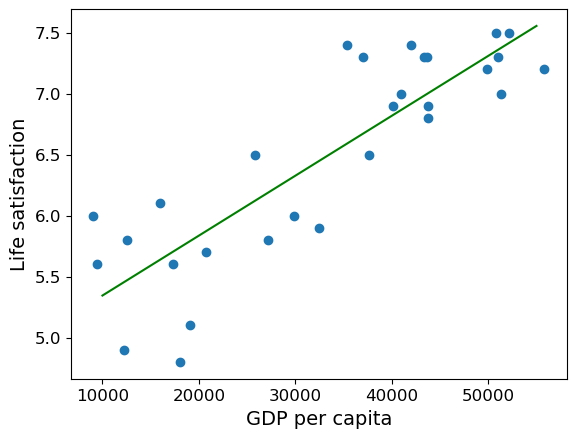

In [10]:
# Alternative way to generate the points on the fitted line
#  - this method works for any type of regression
modelX = np.linspace(10000, 55000, 1000)
print(modelX.shape)
modelX = np.reshape(modelX,(modelX.shape[0],1))
print(modelX.shape)
y_pred = model.predict(modelX)
plt.scatter(X, y)
plt.xlabel('GDP per capita')
plt.ylabel('Life satisfaction')
plt.plot(modelX, y_pred, "g")

(36, 1)
(36, 1)


<AxesSubplot:xlabel='GDP per capita', ylabel='Life satisfaction'>

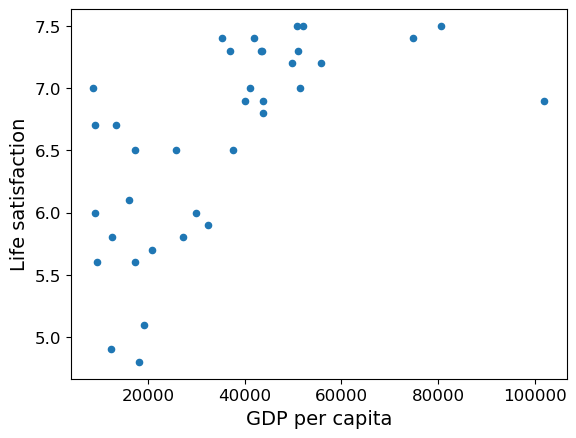

In [11]:
# Section 5
country_stats = pd.read_csv("lifesat-full.csv")

# Note that np.c_ is used in order to make vectors the right *shape* - that is: (N,1) and not (N,) 
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]
print(X.shape)
print(y.shape)

# Plot the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

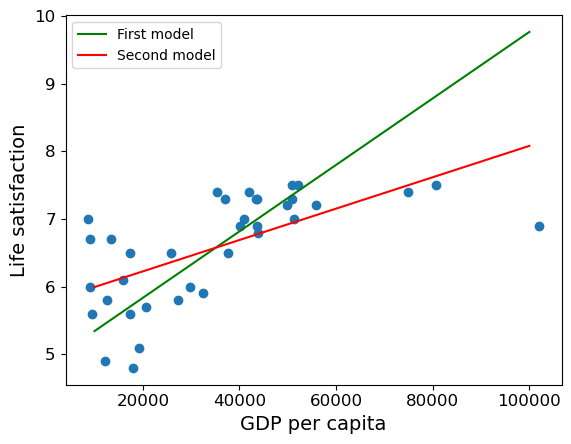

In [12]:
modelX = np.linspace(10000, 100000, 1000)
modelX = np.reshape(modelX,(modelX.shape[0],1))
y_pred1 = model.predict(modelX)  # redo this for the extended range
model2 = sklearn.linear_model.LinearRegression()
model2.fit(X,y)
y_pred2 = model2.predict(modelX)
plt.scatter(X, y, label='_nolegend_')
plt.xlabel('GDP per capita')
plt.ylabel('Life satisfaction')
plt.plot(modelX, y_pred1, "g")
plt.plot(modelX, y_pred2, "r")
plt.legend(['First model','Second model'])

In [13]:
# Quantify the error at the data points (this is the training error - see later weeks for more complete/correct treatment)
MSE1 = np.mean((model.predict(X) - y)**2)
MSE2 = np.mean((model2.predict(X) - y)**2)
print(f'Mean squared errors for models 1 and 2 are {MSE1} and {MSE2}')

Mean squared errors for models 1 and 2 are 0.667083680997901 and 0.36067898256588704


Mean squared error is 0.43633011667121313


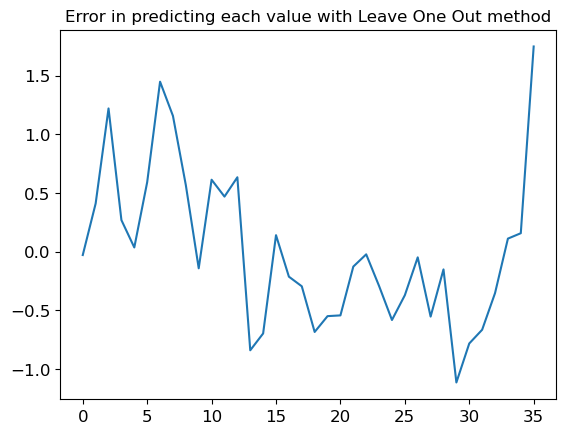

In [14]:
# Section 6 - Implement a Leave One Out method
y_pred = y*0.0  # make an empty placeholder for results
for n in range(X.shape[0]):
    Xtest = np.reshape(X[n],(-1,1))
    Xtrain = np.delete(X,n,axis=0)
    ytrain = np.delete(y,n,axis=0)
    model.fit(Xtrain,ytrain)
    y_pred[n] = model.predict(Xtest)
MSE = np.mean((y_pred - y)**2)
print(f'Mean squared error is {MSE}')
plt.plot(y_pred - y)
plt.title('Error in predicting each value with Leave One Out method')
plt.show()

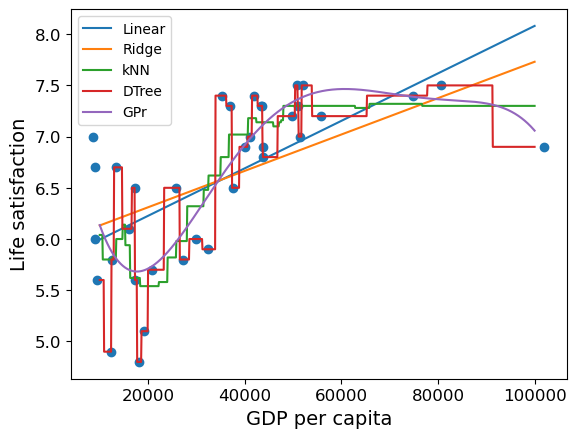

In [15]:
# Section 6 - trying some other methods
import sklearn.neighbors
import sklearn.tree
import sklearn.gaussian_process

plt.scatter(X, y, label='_nolegend_')
plt.xlabel('GDP per capita')
plt.ylabel('Life satisfaction')

# Note that a reasonable hyperparameter setting for the GaussianProcessRegressor was *very* hard to find!
#   This illustrates how important hyperparameters are, and that better pre-processing could have helped a lot (see week 3)
for model in [sklearn.linear_model.LinearRegression(),sklearn.linear_model.Ridge(alpha=5e9),
              sklearn.neighbors.KNeighborsRegressor(),sklearn.tree.DecisionTreeRegressor(),
              sklearn.gaussian_process.GaussianProcessRegressor(
                  kernel=sklearn.gaussian_process.kernels.RBF(200000,length_scale_bounds="fixed"))]:
    model.fit(X,y)
    modelX = np.linspace(10000, 100000, 1000)
    modelX = np.reshape(modelX,(modelX.shape[0],1))
    y_pred = model.predict(modelX)
    plt.plot(modelX, y_pred)
plt.legend(['Linear','Ridge','kNN','DTree','GPr'])